# Dayananda B N, 201EC219

### Department of Electronics & Communication Engineering
#### National Institute of Technology Karnataka 
#### Surathkal, Mangalore-575025(Karnataka), India
#### EC460- Neural Networks and Deep Learning
#### Assignment 1(b): Linear Regression

## Assignment 1(b): Linear Regression

### Write an python code of Perceptron model from scratch (without deep Learning Library) for predicting House sales price using Sklearn Bostan House dataset. Choose random weights and bias of the neuron and learning rate =0.001 with Stochastic Gradient Descent algorithm for the loss Mean Square Error function (b) Plot loss curve for 100 epochs (c) Predict result on test data and compare with target (d) Calculate MAE and RMSE of the model. (e) Compare results between Scikit Library and Perceptron model from scratch (f) repeat part (a) to (e) for Mean Bias Error loss function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
from sklearn import datasets

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [6]:
x_data = pd.DataFrame(data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
y_data = pd.DataFrame(target,columns=['MEDV'])
y_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
data = pd.concat([x_data,y_data],axis = 1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<Axes: >

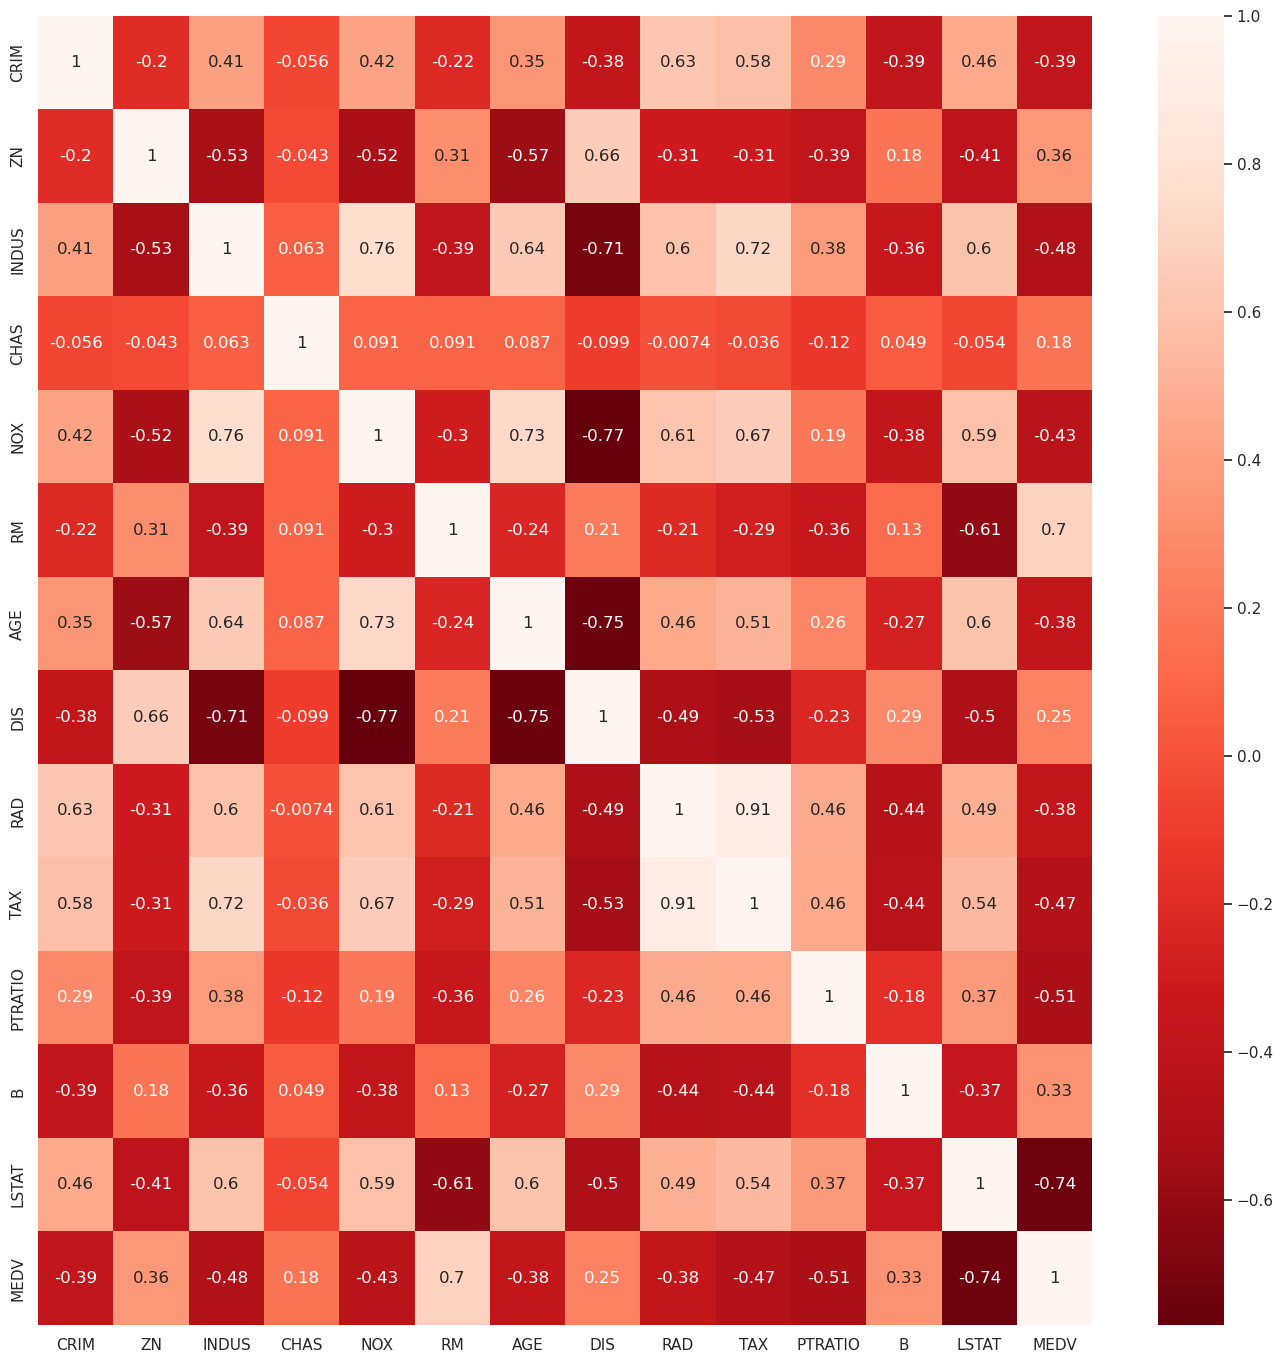

In [13]:
cor = data.corr()
plt.figure(figsize = (17,17))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds_r)

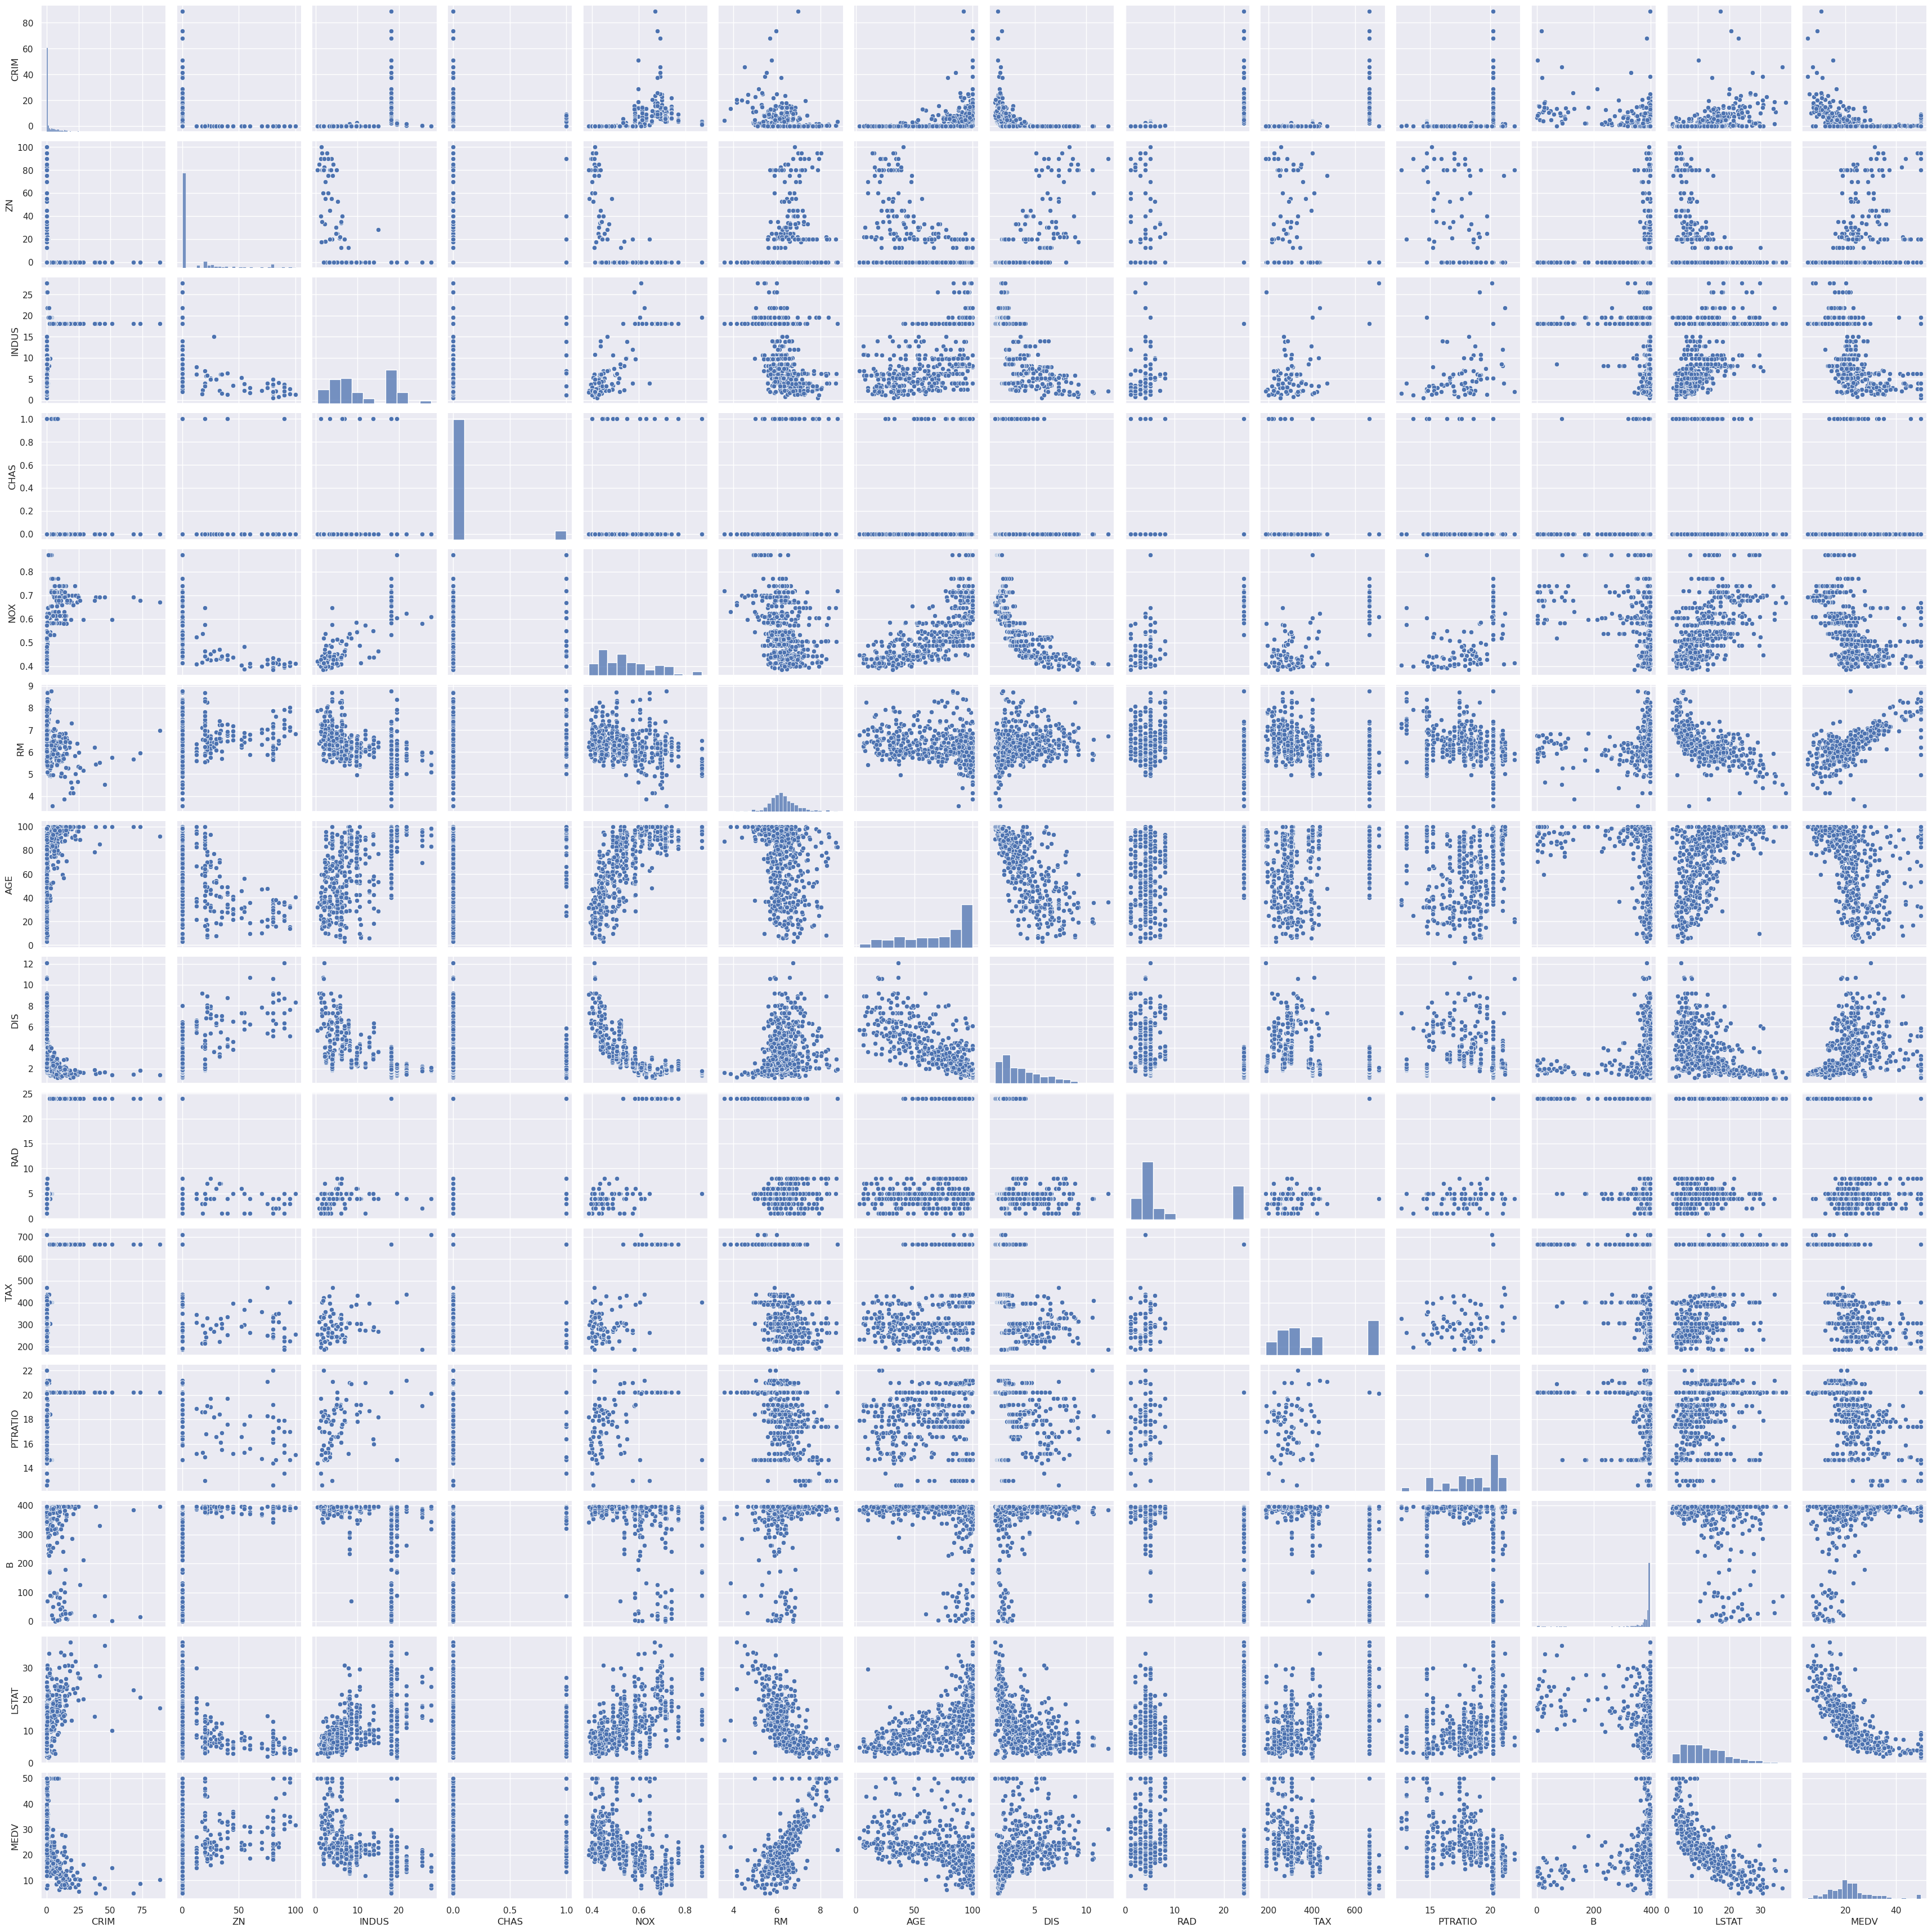

In [14]:
sns.pairplot(data)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x_data)
y_norm = sc.fit_transform(y_data)

In [17]:
x_norm1 = pd.DataFrame(x_norm,columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
x_norm1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [19]:
y_norm1 = pd.DataFrame(y_norm,columns = ['MEDV'])
y_norm1

,MEDV
0,0.159686
1,-0.101524
2,1.324247
3,1.182758
4,1.487503
...,...
501,-0.014454
502,-0.210362
503,0.148802
504,-0.057989


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.2,random_state=42)

In [21]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(404, 13) (404, 1) (102, 13) (102, 1)


### Stochastic Gradient Descent algorithm (from LIbraries)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([[-0.10573498,  0.07635554,  0.030121  ,  0.07689711, -0.21674227,
         0.33910693, -0.01927079, -0.33149399,  0.24845253, -0.19510257,
        -0.21549315,  0.12260527, -0.39487863]])

In [24]:
model.intercept_

array([-0.00517393])

In [25]:
y_pred = model.predict(x_test)

In [26]:
y_pred

array([[ 0.70351645],
       [ 1.46851786],
       [-0.83977499],
       [ 0.27200367],
       [-0.40954742],
       [ 0.07853962],
       [-0.5300677 ],
       [-0.89155486],
       [ 0.0522856 ],
       [-0.20682934],
       [ 0.25856506],
       [-0.42380986],
       [-3.11506228],
       [-0.08429023],
       [-0.358465  ],
       [ 0.39838772],
       [-0.20516661],
       [-1.82173031],
       [ 1.95554101],
       [-0.5354712 ],
       [ 0.51330894],
       [ 0.81992149],
       [-1.21800169],
       [ 0.17718413],
       [-0.50851278],
       [-0.72885288],
       [ 0.02706513],
       [-0.86588505],
       [-0.0105078 ],
       [-0.36313494],
       [-0.01077184],
       [ 0.29244461],
       [ 0.37073194],
       [-0.52581366],
       [-0.6273054 ],
       [-0.60748206],
       [ 0.94695084],
       [-0.26124685],
       [ 0.13419485],
       [ 0.22850278],
       [-0.9349963 ],
       [ 1.05822208],
       [ 2.19195472],
       [-0.5665378 ],
       [ 0.51625749],
       [-0

### Stochastic Gradient Descent algorithm (from Scratch code)

### (i) Mean Square Error

In [27]:
# cost function implimentation
def cal_cost(theta,x,y):
    y_pred = np.dot(x,theta)
    J = (1/len(y))*np.sum((y_pred - y)**2)
    
    return J

In [28]:
def stochastic_gradient_descent(x,y,theta,lr,epochs):
    m = len(y_train)
    theta_history = np.zeros((epochs,14))
    cost_history = np.zeros((epochs))
    for i in range(epochs):
        cost_per_iteration = 0.0
        for j in range(m):

            l = int(np.random.randint(m))
            x_in = x_train[l].reshape(1,-1)
            x_inner = np.c_[np.ones((len(x_in),1)),x_in]
            y_inner = y_train[l].reshape(1,1)
            # Forward Propagation
            y_pred = np.dot(x_inner,theta)
            # computing the cost value
            cost_per_iteration = cost_per_iteration + cal_cost(theta,x_inner,y_inner)
            # backpropagation
            d_theta = (2/len(y_train))*(x_inner.T.dot((y_pred - y_inner)))
            # weight update
            theta = theta - (lr*d_theta)
        cost_history[i] = cost_per_iteration
    return theta,cost_history,theta_history

In [30]:
# Calling Stochastic gradient descent 
import time
lr  = 0.001
epochs = 10000
theta = np.random.randn(14,1)
print("Initial values of weights")
print(theta)

x_b = np.c_[np.ones((len(x_train),1)),x_train]

# Calling SGD
t20 = time.time()
theta,cost_history,theta_history = stochastic_gradient_descent(x_b,y_train,theta,lr,epochs)
t21 = time.time()
time_SGD = t21 - t20
print("Processing Time of SGD Algorithm")
print(time_SGD)
print(theta)


x_b1 = np.c_[np.ones((len(x_test),1)),x_test]
# Predict value by NN
y_pred = np.dot(x_b1,theta)
print("Optimal value of weights")
print('{:<10}{:.3}'.format('Theta0',theta[0][0]))
print('{:<10}{:.3}'.format('Theta1',theta[1][0]))
print('{:<10}{:.3}'.format('Theta2',theta[2][0]))
print('{:<10}{:.3}'.format('Theta3',theta[3][0]))
print('{:<10}{:.3}'.format('Theta4',theta[4][0]))
print('{:<10}{:.3}'.format('Theta5',theta[5][0]))
print('{:<10}{:.3}'.format('Theta6',theta[6][0]))
print('{:<10}{:.3}'.format('Theta7',theta[7][0]))
print('{:<10}{:.3}'.format('Theta8',theta[8][0]))
print('{:<10}{:.3}'.format('Theta9',theta[9][0]))
print('{:<10}{:.3}'.format('Theta10',theta[10][0]))
print('{:<10}{:.3}'.format('Theta11',theta[11][0]))
print('{:<10}{:.3}'.format('Theta12',theta[12][0]))
print('{:<10}{:.3}'.format('Theta13',theta[13][0]))
print("Minimum value of cost function")
print('{:<10}{:.3}'.format('Cost/MSE',cost_history[-1]))

# print(y_predicted)
y_true = np.c_[y_pred,y_test]
print(y_true)

Initial values of weights
[[-0.30932314]
 [ 0.91664637]
 [-0.02799687]
 [-1.17988087]
 [-0.14276676]
 [ 0.00476548]
 [ 0.89216118]
 [-0.43151049]
 [-0.10644732]
 [-0.34547845]
 [-0.68268071]
 [ 2.09517438]
 [ 1.69966417]
 [-0.08752321]]
Processing Time of SGD Algorithm
138.4701075553894
[[-0.00676057]
 [-0.09712797]
 [ 0.06928864]
 [-0.00843323]
 [ 0.08057016]
 [-0.17490396]
 [ 0.35250482]
 [-0.03948339]
 [-0.32731102]
 [ 0.16178638]
 [-0.11838774]
 [-0.19754297]
 [ 0.1231864 ]
 [-0.38473607]]
Optimal value of weights
Theta0    -0.00676
Theta1    -0.0971
Theta2    0.0693
Theta3    -0.00843
Theta4    0.0806
Theta5    -0.175
Theta6    0.353
Theta7    -0.0395
Theta8    -0.327
Theta9    0.162
Theta10   -0.118
Theta11   -0.198
Theta12   0.123
Theta13   -0.385
Minimum value of cost function
Cost/MSE  1.1e+02
[[ 0.68752313  0.11615067]
 [ 1.45626376  1.07392047]
 [-0.73271683 -0.97222411]
 [ 0.26692821  0.02908069]
 [-0.41376765 -0.70013041]
 [ 0.06179229 -0.27566425]
 [-0.53097633 -0.5151067

#### (b) Plot loss curve for 10000 epochs

Text(0, 0.5, 'Loss')

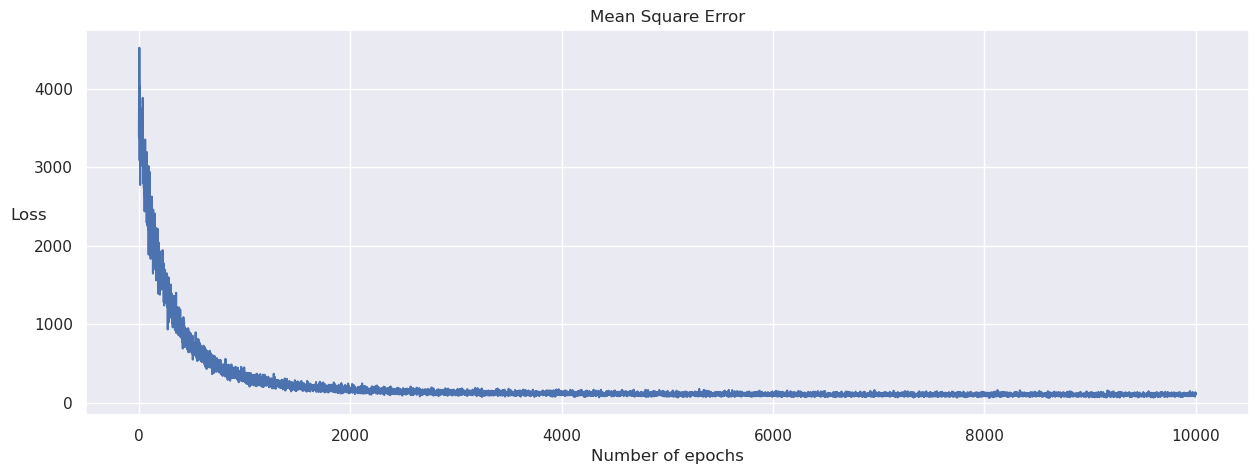

In [31]:
# Plotting the loss function
plt.figure(figsize=(15,5))
plt.plot(range(epochs),cost_history)
plt.title('Mean Square Error')
plt.xlabel('Number of epochs')
plt.ylabel('Loss',rotation = 0)

#### (c) Calculate MAE and RMSE of the model

In [32]:
def rmse(yHAT,y):
    rmse = np.sqrt(np.sum((yHAT-y)**2)/y.size)
    return rmse


def MAE(yHAT,y):
    return np.sum(np.absolute(yHAT-y))/y.size

print("MAE is ",MAE(y_pred,y_true))
print("RMSE is ",rmse(y_pred,y_true))

MAE is  0.1741886801088522
RMSE is  0.38379073378400497


### Mean Bias Error

In [33]:
# cost function implimentation
def cal_cost(theta,x,y,epsilon = 0.1):
    y_pred = np.dot(x,theta)
    J = np.sum((y_pred,y))/y.size
    
    return J

def stochastic_gradient_descent(x,y,theta,lr,epochs):
    m = len(y_train)
    theta_history = np.zeros((epochs,14))
    cost_history = np.zeros((epochs))
    for i in range(epochs):
        cost_per_iteration = 0.0
        for j in range(m):

            l = int(np.random.randint(m))
            x_in = x_train[l].reshape(1,-1)
            x_inner = np.c_[np.ones((len(x_in),1)),x_in]
            y_inner = y_train[l].reshape(1,1)
            # Forward Propagation
            y_pred = np.dot(x_inner,theta)
            # computing the cost value
            cost_per_iteration = cost_per_iteration + cal_cost(theta,x_inner,y_inner)
            # backpropagation
            d_theta = (2/len(y_train))*(x_inner.T.dot((y_pred - y_inner)))
            # weight update
            theta = theta - (lr*d_theta)
        cost_history[i] = cost_per_iteration
    return theta,cost_history,theta_history

# Calling Stochastic gradient descent 
import time
lr  = 0.001
epochs = 10000
theta = np.random.randn(14,1)
print("Initial values of weights")
print(theta)

x_b = np.c_[np.ones((len(x_train),1)),x_train]

# Calling SGD
t20 = time.time()
theta,cost_history,theta_history = stochastic_gradient_descent(x_b,y_train,theta,lr,epochs)
t21 = time.time()
time_SGD = t21 - t20
print("Processing Time of SGD Algorithm")
print(time_SGD)
print(theta)


x_b1 = np.c_[np.ones((len(x_test),1)),x_test]
# Predict value by NN
y_pred = np.dot(x_b1,theta)
print("Optimal value of weights")
print('{:<10}{:.3}'.format('Theta0',theta[0][0]))
print('{:<10}{:.3}'.format('Theta1',theta[1][0]))
print('{:<10}{:.3}'.format('Theta2',theta[2][0]))
print('{:<10}{:.3}'.format('Theta3',theta[3][0]))
print('{:<10}{:.3}'.format('Theta4',theta[4][0]))
print('{:<10}{:.3}'.format('Theta5',theta[5][0]))
print('{:<10}{:.3}'.format('Theta6',theta[6][0]))
print('{:<10}{:.3}'.format('Theta7',theta[7][0]))
print('{:<10}{:.3}'.format('Theta8',theta[8][0]))
print('{:<10}{:.3}'.format('Theta9',theta[9][0]))
print('{:<10}{:.3}'.format('Theta10',theta[10][0]))
print('{:<10}{:.3}'.format('Theta11',theta[11][0]))
print('{:<10}{:.3}'.format('Theta12',theta[12][0]))
print('{:<10}{:.3}'.format('Theta13',theta[13][0]))
print("Minimum value of cost function")
print('{:<10}{:.3}'.format('Cost/MSE',cost_history[-1]))

# print(y_predicted)
y_true = np.c_[y_pred,y_test]
print(y_true)

Initial values of weights
[[-2.02150805]
 [-0.12949245]
 [-0.59167647]
 [-0.30287642]
 [ 1.24459031]
 [ 0.45010348]
 [ 0.91731349]
 [ 0.29911303]
 [-0.04419519]
 [ 0.0933958 ]
 [ 0.22278685]
 [ 0.80294353]
 [ 0.0328141 ]
 [-1.34416177]]
Processing Time of SGD Algorithm
153.29971933364868
[[-0.00600188]
 [-0.09395645]
 [ 0.0542965 ]
 [-0.01125622]
 [ 0.08036826]
 [-0.18800219]
 [ 0.3449263 ]
 [-0.01991787]
 [-0.3087674 ]
 [ 0.13089221]
 [-0.07152239]
 [-0.20599429]
 [ 0.12175595]
 [-0.39625127]]
Optimal value of weights
Theta0    -0.006
Theta1    -0.094
Theta2    0.0543
Theta3    -0.0113
Theta4    0.0804
Theta5    -0.188
Theta6    0.345
Theta7    -0.0199
Theta8    -0.309
Theta9    0.131
Theta10   -0.0715
Theta11   -0.206
Theta12   0.122
Theta13   -0.396
Minimum value of cost function
Cost/MSE  -21.3
[[ 0.6989729   0.11615067]
 [ 1.41744959  1.07392047]
 [-0.64328068 -0.97222411]
 [ 0.26220319  0.02908069]
 [-0.41671891 -0.70013041]
 [ 0.10088043 -0.27566425]
 [-0.5251604  -0.5151067 ]
 

#### (b) Plot loss curve for 10000 epochs

Text(0, 0.5, 'Loss')

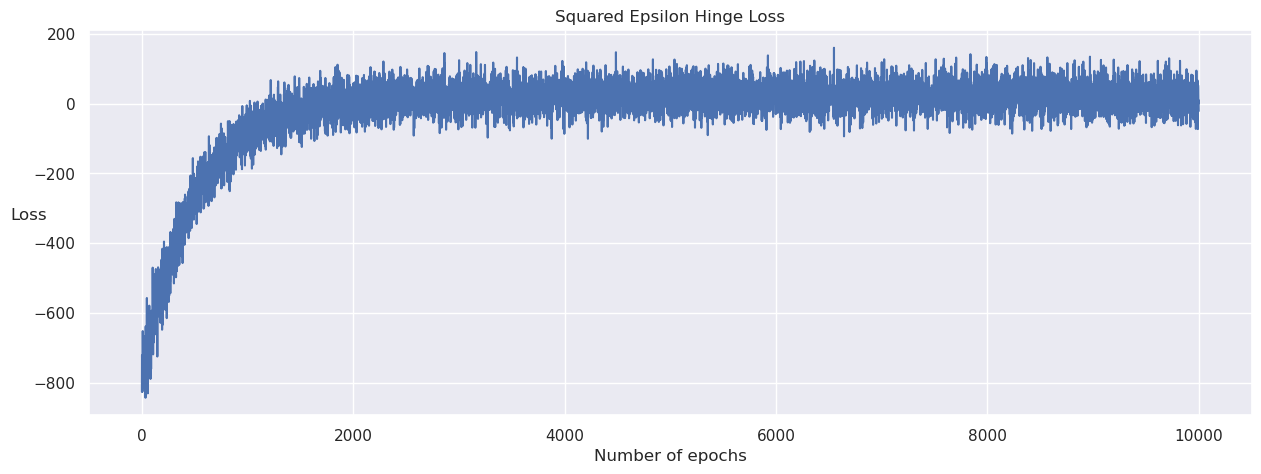

In [34]:
# Plotting the loss function
plt.figure(figsize=(15,5))
plt.plot(range(epochs),cost_history)
plt.title('Squared Epsilon Hinge Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss',rotation = 0)

#### (c) Calculate MAE and RMSE of the model

In [35]:
def rmse(yHAT,y):
    rmse = np.sqrt(np.sum((yHAT-y)**2)/y.size)
    return rmse


def MAE(yHAT,y):
    return np.sum(np.absolute(yHAT-y))/y.size

print("MAE is ",MAE(y_pred,y_true))
print("RMSE is ",rmse(y_pred,y_true))

MAE is  0.17538903669323272
RMSE is  0.3848916305887103
